# Speed Testing: Show Homes - Analysis

Analysis done for show home speed testing in March 2022.

In [1]:
%load_ext autoreload
%autoreload 2

import json
import requests
import yaml
from time import sleep 
from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict 

from keplergl import KeplerGl
from scipy.spatial.distance import cdist
from geopy.distance import distance as geodist 

from asf_core_data import load_preprocessed_epc_data
from asf_core_data.getters.epc.epc_data import load_preprocessed_epc_data
from asf_core_data.pipeline.preprocessing import feature_engineering

from show_homes import PROJECT_DIR
from show_homes.getters.show_home_data import get_show_home_data
from show_homes.config import config
from show_homes.utils import geo_utils

### Analysis driving and air distances and travel times 

Show driving distances, air distances and travel times for potential show home network.

In [2]:
df = pd.read_csv(config.DIST_DUR_OUT_DATA_PATH / 'distances_and_durations.csv')
df.head()

,Index,Property Type,HP Property,Latitude 1,Longitude 1,Latitude 2,Longitude 2,Distance,Duration
0,0,Flat,any,52.996754,-1.192366,52.997998,-1.123028,8.906667,6.4365
1,1,Flat,any,56.386286,-3.442168,56.484286,-3.451567,16.891667,17.3055
2,2,Flat,any,52.474495,-1.953125,52.463624,-1.899943,7.936667,5.0436
3,3,Flat,any,50.974174,-1.367849,50.896872,-1.391689,16.123333,10.3910
4,4,Flat,any,51.525961,-0.013176,51.508361,0.024030,8.710000,5.2789


In [3]:
flat_any = df.loc[(df['Property Type'] == 'Flat') & (df['HP Property'] == 'any')]
semi_detached_any = df.loc[(df['Property Type'] == 'Semi-detached house') & (df['HP Property'] == 'any')]
detached_any = df.loc[(df['Property Type'] == 'Detached House') & (df['HP Property'] == 'any')]
terraced_any = df.loc[(df['Property Type'] == 'Terraced House') & (df['HP Property'] == 'any')]
all_any = df.loc[(df['Property Type'] == 'All') & (df['HP Property'] == 'any')]

flat_similar = df.loc[(df['Property Type'] == 'Flat') & (df['HP Property'] == 'similar')]
semi_detached_similar = df.loc[(df['Property Type'] == 'Semi-detached house') & (df['HP Property'] == 'similar')]
detached_similar = df.loc[(df['Property Type'] == 'Detached House') & (df['HP Property'] == 'similar')]
terraced_similar = df.loc[(df['Property Type'] == 'Terraced House') & (df['HP Property'] == 'similar')]
all_similar = df.loc[(df['Property Type'] == 'All') & (df['HP Property'] == 'similar')]

In [4]:
print('All')
print('-----')
print('Samples:', all_any.shape[0])
print('Distance (mean):', round(all_any['Distance'].mean(),1))
print('Duration (mean):', round(all_any['Duration'].mean(),1))
print()
print('Distance (mean):', round(all_similar['Distance'].mean(),1))
print('Duration (mean):', round(all_similar['Duration'].mean(),1))
print()
print('Flat')
print('-----')
print('Samples:', flat_any.shape[0])
print('Distance (mean):', round(flat_any['Distance'].mean(),1))
print('Duration (mean):', round(flat_any['Duration'].mean(),1))
print()
print('Samples:', flat_similar.shape[0])
print('Distance (mean):', round(flat_similar['Distance'].mean(),1))
print('Duration (mean):', round(flat_similar['Duration'].mean(),1))
print()
print('Detached House')
print('-----')
print('Samples:', detached_any.shape[0])
print('Distance (mean):', round(detached_any['Distance'].mean(),1))
print('Duration (mean):', round(detached_any['Duration'].mean(),1))
print()
print(detached_similar.shape[0])
print('Distance (median):', round(detached_similar['Distance'].mean(),1))
print('Duration (median):', round(detached_similar['Duration'].mean(),1))
print()
print('Semi-detached House')
print('-----')
print('Samples:', semi_detached_any.shape[0])
print('Distance (mean):', round(semi_detached_any['Distance'].mean(),1))
print('Duration (mean):', round(semi_detached_any['Duration'].mean(),1))
print()
print('Samples:', semi_detached_similar.shape[0])
print('Distance (mean):', round(semi_detached_similar['Distance'].mean(),1))
print('Duration (mean):', round(semi_detached_similar['Duration'].mean(),1))
print()
print('Terraced House')
print('-----')
print('Samples:', terraced_any.shape[0])
print('Distance (mean):', round(terraced_any['Distance'].mean(),1))
print('Duration (mean):', round(terraced_any['Duration'].mean(),1))
print()
print(terraced_similar.shape[0])
print('Distance (mean):', round(terraced_similar['Distance'].mean(),1))
print('Duration (mean):', round(terraced_similar['Duration'].mean(),1))
print()




All
-----
Samples: 9999
Distance (mean): 11.8
Duration (mean): 8.9

Distance (mean): nan
Duration (mean): nan

Flat
-----
Samples: 2774
Distance (mean): 11.6
Duration (mean): 8.5

Samples: 2774
Distance (mean): 24.7
Duration (mean): 22.6

Detached House
-----
Samples: 1288
Distance (mean): 12.9
Duration (mean): 10.2

1288
Distance (median): 20.6
Duration (median): 18.2

Semi-detached House
-----
Samples: 2078
Distance (mean): 12.3
Duration (mean): 9.6

Samples: 2078
Distance (mean): 28.6
Duration (mean): 27.6

Terraced House
-----
Samples: 2606
Distance (mean): 12.0
Duration (mean): 9.1

2606
Distance (mean): 27.4
Duration (mean): 27.2



In [5]:
print('All')
print('-----')
print('Samples:', all_any.shape[0])
print('Distance (median):', round(all_any['Distance'].median(),1))
print('Duration (median):', round(all_any['Duration'].median(),1))
print()
print('Distance (median):',round(all_similar['Distance'].median(),1))
print('Duration (median):', round(all_similar['Duration'].median(),1))
print()
print('Flat')
print('-----')
print('Samples:', flat_any.shape[0])
print('Distance (median):',round(flat_any['Distance'].median(),1))
print('Duration (median):', round(flat_any['Duration'].median(),1))
print()
print('Samples:', flat_similar.shape[0])
print('Distance (median):',round(flat_similar['Distance'].median(),1))
print('Duration (median):', round(flat_similar['Duration'].median(),1))
print()
print('Detached House')
print('-----')
print('Samples:', detached_any.shape[0])
print('Distance (median):',round(detached_any['Distance'].median(),1))
print('Duration (median):', round(detached_any['Duration'].median(),1))
print()
print(detached_similar.shape[0])
print('Distance (median):',round(detached_similar['Distance'].median(),1))
print('Duration (median):', round(detached_similar['Duration'].median(),1))
print()
print('Semi-detached House')
print('-----')
print('Samples:', semi_detached_any.shape[0])
print('Distance (median):',round(semi_detached_any['Distance'].median(),1))
print('Duration (median):', round(semi_detached_any['Duration'].median(),1))
print()
print('Samples:', semi_detached_similar.shape[0])
print('Distance (median):',round(semi_detached_similar['Distance'].median(),1))
print('Duration (median):', round(semi_detached_similar['Duration'].median(),1))
print()
print('Terraced House')
print('-----')
print('Samples:', terraced_any.shape[0])
print('Distance (median):',round(terraced_any['Distance'].median(),1))
print('Duration (median):', round(terraced_any['Duration'].median(),1))
print()
print('Samples:', terraced_similar.shape[0])
print('Distance (median):', round(terraced_similar['Distance'].median(),1))
print('Duration (median):', round(terraced_similar['Duration'].median(),1))
print()

All
-----
Samples: 9999
Distance (median): 10.4
Duration (median): 7.3

Distance (median): nan
Duration (median): nan

Flat
-----
Samples: 2774
Distance (median): 9.7
Duration (median): 6.0

Samples: 2774
Distance (median): 17.4
Duration (median): 13.5

Detached House
-----
Samples: 1288
Distance (median): 11.6
Duration (median): 8.9

1288
Distance (median): 18.5
Duration (median): 15.4

Semi-detached House
-----
Samples: 2078
Distance (median): 11.3
Duration (median): 8.2

Samples: 2078
Distance (median): 23.1
Duration (median): 21.5

Terraced House
-----
Samples: 2606
Distance (median): 10.6
Duration (median): 7.5

Samples: 2606
Distance (median): 21.5
Duration (median): 19.1



In [6]:
distances = {'Flat' : flat_any,
             'Semi-detached House': semi_detached_any,
             'Detached House': detached_any,
             'Terraced House' : terraced_any,
             'All' : all_any}

distances_similar = {'Flat' : flat_similar,
             'Semi-detached House': semi_detached_similar,
             'Detached House': detached_similar,
             'Terraced House' : terraced_similar,
             'All' : all_any}

cond_labels = ['All', 'Flat',  'Terraced House','Detached House','Semi-detached House']


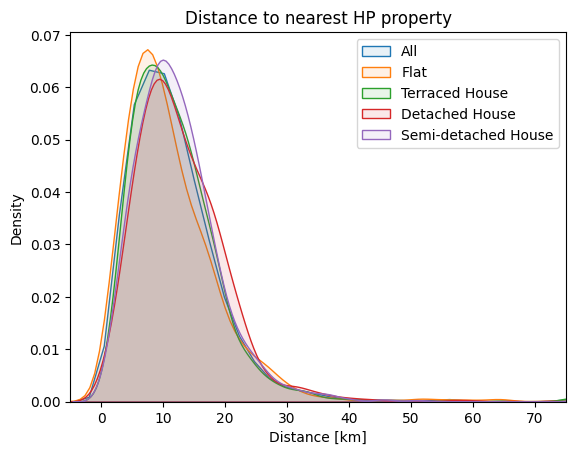

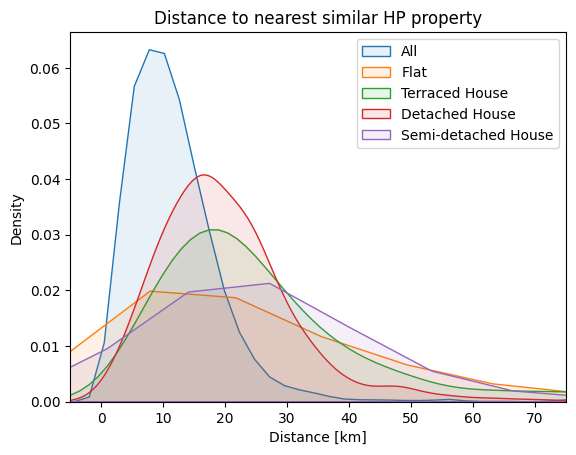

In [7]:
for label in cond_labels:
    sns.kdeplot(data=distances[label]['Distance'], fill=True, common_norm=False, alpha=0.1)
plt.legend(cond_labels)
plt.xlabel('Distance [km]')
plt.title('Distance to nearest HP property')
plt.xlim(-5,75)
plt.savefig(config.FIG_OUT_PATH / 'Distance to nearest HP property.png', dpi=300)
plt.show()

for label in cond_labels:
    sns.kdeplot(data=distances_similar[label]['Distance'], fill=True, common_norm=False, alpha=0.1)
plt.legend(cond_labels)
plt.xlabel('Distance [km]')
plt.title('Distance to nearest similar HP property')
plt.xlim(-5,75)
plt.savefig(config.FIG_OUT_PATH / 'Distance to nearest similar HP property.png', dpi=300)
plt.show()

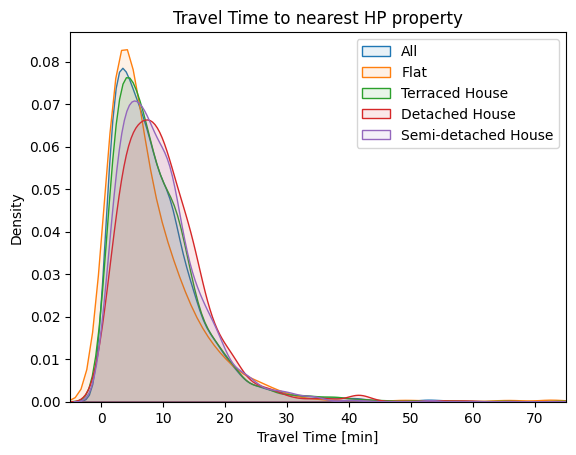

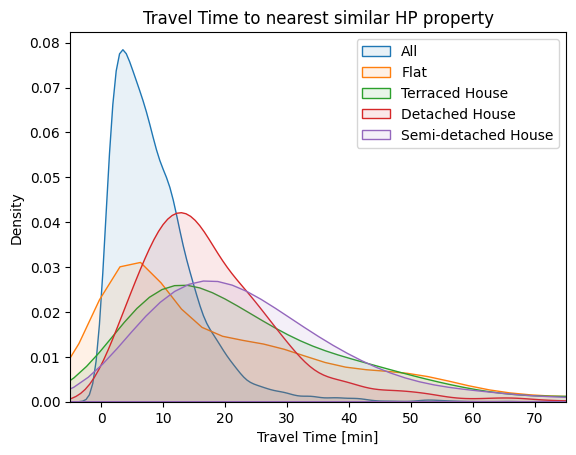

In [8]:
for label in cond_labels:
    sns.kdeplot(data=distances[label]['Duration'], fill=True, common_norm=False, alpha=0.1)
plt.legend(cond_labels)
plt.xlabel('Travel Time [min]')
plt.title('Travel Time to nearest HP property')
plt.xlim(-5,75)
plt.savefig(config.FIG_OUT_PATH / 'Travel Time to nearest HP property.png', dpi=300)
plt.show()

for label in cond_labels:
    sns.kdeplot(data=distances_similar[label]['Duration'], fill=True, common_norm=False, alpha=0.1)
plt.legend(cond_labels)
plt.xlabel('Travel Time [min]')
plt.title('Travel Time to nearest similar HP property')
plt.xlim(-5,75)
plt.savefig(config.FIG_OUT_PATH  / 'Travel Time to nearest similar HP property.png', dpi=300)
plt.show()

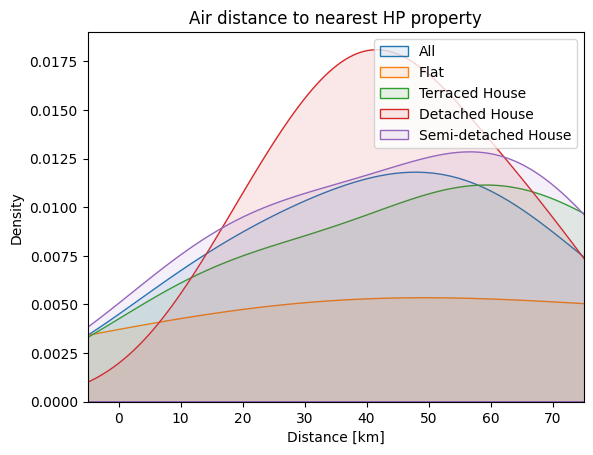

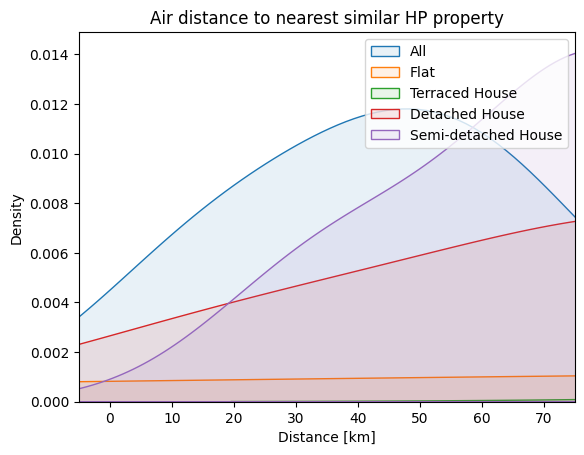

In [9]:
for label in cond_labels:
    dist_matrix = np.load(config.DIST_MATRIX_OUT_DATA_PATH  / '{}_any.npy'.format(label))
    dist_matrix = np.min(dist_matrix, axis=1)
    sns.kdeplot(data=dist_matrix, fill=True, common_norm=False, alpha=0.1)
plt.legend(cond_labels)
plt.xlabel('Distance [km]')
plt.title('Air distance to nearest HP property')
plt.xlim(-5,75)
plt.savefig(config.FIG_OUT_PATH  / 'Air distance to nearest HP property.png', dpi=300)
plt.show()

for label in cond_labels:
    dist_matrix_similar = np.load(config.DIST_MATRIX_OUT_DATA_PATH / '{}_similar.npy'.format(label))
    dist_matrix_similar = np.min(dist_matrix_similar, axis=1)
    sns.kdeplot(data=dist_matrix_similar, fill=True, common_norm=False, alpha=0.1)
    
plt.legend(cond_labels)
plt.xlabel('Distance [km]')
plt.title('Air distance to nearest similar HP property')
plt.xlim(-5,75)
plt.savefig(config.FIG_OUT_PATH  / 'Air distance to nearest similar HP property.png', dpi=300)
plt.show()

### Map showing distance between to closest similar property with heat pump

In [10]:

with open(config.KEPLER_CONFIG_PATH / 'show_home_network_speed_testing.txt', "r") as infile:
    kepler_config = yaml.load(infile.read(), Loader=yaml.FullLoader)

flat_similar = flat_similar.round({'Distance':1, 'Duration':1})
semi_detached_similar = semi_detached_similar.round({'Distance':1, 'Duration':1})
detached_similar = detached_similar.round({'Distance':1, 'Duration':1})
terraced_similar = terraced_similar.round({'Distance':1, 'Duration':1})

flat_similar.rename(columns={'Distance':'Distance [in km]'}, inplace=True)
semi_detached_similar.rename(columns={'Distance':'Distance [in km]'}, inplace=True)
detached_similar.rename(columns={'Distance':'Distance [in km]'}, inplace=True)
terraced_similar.rename(columns={'Distance':'Distance [in km]'}, inplace=True)


distance = KeplerGl(height=500, config=kepler_config)

distance.add_data(
    data=flat_similar[["Latitude 1", "Longitude 1", "Latitude 2", "Longitude 2", 'Distance [in km]', 'Duration']], name="Flat")

distance.add_data(
    data=semi_detached_similar[["Latitude 1", "Longitude 1", "Latitude 2", "Longitude 2", 'Distance [in km]', 'Duration']], name="Semi-detached House")

distance.add_data(
    data=detached_similar[["Latitude 1", "Longitude 1", "Latitude 2", "Longitude 2", 'Distance [in km]', 'Duration']], name="Detached House")

distance.add_data(
    data=terraced_similar[["Latitude 1", "Longitude 1", "Latitude 2", "Longitude 2", 'Distance [in km]', 'Duration']], name="Terraced House")

# Too much data to load for one map
#distance.add_data(
  #  data=all_similar[["Latitude 1", "Longitude 1", "Latitude 2", "Longitude 2", 'Distance', 'Duration']], name="All")

distance


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'm0k9kvp', 'type': …

In [11]:
with open(config.KEPLER_CONFIG_PATH / 'show_home_network_speed_testing.txt', "w") as outfile:
    outfile.write(str(distance.config))

distance.save_to_html(file_name= config.MAPS_OUT_PATH /  "show_homes_distances_similar.html")

Map saved to /Users/juliasuter/show_homes/outputs/maps/show_homes_distances_similar.html!


### Computing the driving distance for HP and no-HP properties

Load the EPC data, split into different property types and randomly sample 10 000 samples for properies with heat pumps and properties without. Then compute the driving distance and travel time. 

In [12]:
epc_df = get_show_home_data()

In [13]:
no_cond = (~epc_df['LATITUDE'].isna()) & (~epc_df['LONGITUDE'].isna())
flat = epc_df['PROPERTY_TYPE'] == 'Flat'
terraced_house = ((epc_df['PROPERTY_TYPE'] == 'House') & (epc_df['BUILT_FORM'] == 'Terraced'))
detached_house = ((epc_df['PROPERTY_TYPE'] == 'House') & (epc_df['BUILT_FORM'] == 'Detached'))               
semi_house = ((epc_df['PROPERTY_TYPE'] == 'House') & (epc_df['BUILT_FORM'] == 'Semi-Detached'))

 
cond_labels = ['Flat', 'Semi-detached house', 'Detached House', 'Terraced House', 'All']

epc_df = epc_df[no_cond]

def compute_distance_and_time_to_nearest_hp(epc_df, outfile, n_no_hp_samples=10000, n_hp_samples=100, save_arrays=True):

    dist_matrices = {}
    dist_matrices_similar = {}

    with open(outfile, 'w') as outfile:

        outfile.write('Index,Property Type,HP Property,Latitude 1,Longitude 1,Latitude 2,Longitude 2,Distance,Duration\n')

        for i, conds in enumerate([flat, semi_house, detached_house, terraced_house, no_cond]):

            label = cond_labels[i]

            epc_df_sampled = epc_df.loc[~epc_df['HP_INSTALLED']].sample(frac=1, random_state=42)[:n_no_hp_samples]
            hp_sampled = epc_df.loc[epc_df['HP_INSTALLED']].sample(frac=1, random_state=42)[:n_hp_samples]

            print(label)
            print('-----')

            epc_df_sampled = epc_df_sampled.loc[conds]
            print('# No HP properties:', epc_df_sampled.shape[0])

            prop_coords = epc_df_sampled[['LATITUDE', 'LONGITUDE']].to_numpy()
            hp_prop_coords = hp_sampled[['LATITUDE', 'LONGITUDE']].to_numpy()

            dist_matrix = cdist(prop_coords, hp_prop_coords, lambda u, v: geodist(u, v).km) # choose unit

            hp_prop_coords_similar_type = hp_sampled.loc[conds][['LATITUDE', 'LONGITUDE']].to_numpy()

            print('# HP properties:', hp_prop_coords.shape[0])
            print('# Similar HP properties:', hp_prop_coords_similar_type.shape[0])

            dist_matrix_similar = cdist(prop_coords, hp_prop_coords_similar_type, lambda u, v: geodist(u, v).km) # choose unit

            print('Mean air distance, any property: {0:.2f} km'.format(np.min(dist_matrix, axis=1).mean()))
            print('Mean air distance, similar property: {0:.2f} km'.format(np.min(dist_matrix_similar, axis=1).mean()))
            print()

            dist_matrices[label] = dist_matrix
            dist_matrices_similar[label] = dist_matrix_similar

            if save_arrays:
                np.save(config.DIST_MATRIX_OUT_DATA_PATH / f'{label}_any.npy', dist_matrix)
                np.save(config.DIST_MATRIX_OUT_DATA_PATH / f'{label}_similar.npy', dist_matrix_similar)

            # Now compute driving distance for all shortest air distance pairs
            for dist_label, matrix in zip(['any', 'similar'],[dist_matrix, dist_matrix_similar]):

                distances = []
                durations = []
                failed = []
                ind = np.argmin(matrix, axis=1)
                
                hp_property_coords = hp_prop_coords_similar_type if dist_label == 'similar' else hp_prop_coords

                for i, coord_pair in enumerate(zip(prop_coords, hp_property_coords[ind])):
                                        
                    if label == 'All' and dist_label == 'similar':
                        continue

                    coords_1 = (coord_pair[0][0],coord_pair[0][1])
                    coords_2 = (coord_pair[1][0],coord_pair[1][1])

                    dist_duration = geo_utils.get_travel_distance_and_duration(coords_1, coords_2)
                    if dist_duration is None:
                        failed.append(i)
                        continue
                    
                    distance, duration = dist_duration
                    distances.append(distance)
                    durations.append(duration)
                    
                    out = [str(i), label,dist_label,str(coords_1[0]),str(coords_1[1]),str(coords_2[0]),str(coords_2[1]),str(distance),str(duration)]
                    out = ','.join(out)
                    
                    outfile.write(out)
                    outfile.write('\n')

                    sleep(1.5) 

                if distances:
                    print('Matches with {} HP property\n~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~'.format(dist_label))
                    print('Mean distance: {0:.2f} km'.format(np.array(distances).mean()))
                    print('Mean duration: {0:.2f} min'.format(np.array(durations).mean()))
                    print('Failed:', failed if failed else 'no fails\n')

In [14]:
outfile_test = config.DIST_DUR_OUT_DATA_PATH / 'distances_and_durations_test.csv'

# For testing, run with few samples
# For full run, use default values
compute_distance_and_time_to_nearest_hp(epc_df, outfile_test, n_no_hp_samples=25, n_hp_samples=15, save_arrays=False)

Flat
-----
# No HP properties: 5
# HP properties: 15
# Similar HP properties: 1
Mean air distance, any property: 76.88 km
Mean air distance, similar property: 315.76 km

Matches with any HP property
~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~
Mean distance: 95.87 km
Mean duration: 108.44 min
Failed: no fails

Matches with similar HP property
~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~
Mean distance: 285.90 km
Mean duration: 379.49 min
Failed: no fails

Semi-detached house
-----
# No HP properties: 4
# HP properties: 15
# Similar HP properties: 6
Mean air distance, any property: 44.41 km
Mean air distance, similar property: 68.34 km

Matches with any HP property
~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~
Mean distance: 52.45 km
Mean duration: 58.42 min
Failed: no fails

Matches with similar HP property
~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~
Mean distance: 74.11 km
Mean duration: 95.13 min
Failed: no fails

Detached House
-----
# No HP properties: 4
# HP properties: 15
# Similar HP properties: 6
Mean air distance, any property: 

In [17]:
compute_distance_and_time_to_nearest_hp(epc_df, config.DIST_DUR_OUT_DATA_PATH / 'distances_and_durations_full.csv')

Flat
-----
# No HP properties: 2824
# HP properties: 100
# Similar HP properties: 17
Mean air distance, any property: 17.73 km
Mean air distance, similar property: 55.24 km

